# LLM's y Agentes.

**Por Exdata y el Taller de Datos Populares**

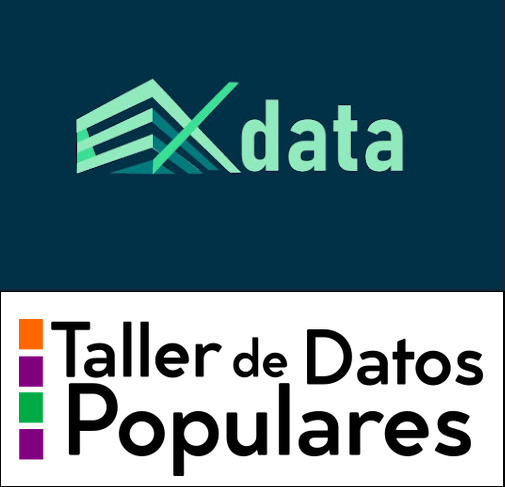

In [ ]:
# Instalamos groq para usar el LLM a travez de una API
# Link a la pagina de groq: https://console.groq.com/keys
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 6.8 MB/s eta 0:00:00


Documentacion: https://console.groq.com/docs/quickstart

# Hola mundo (Version LLMS)

In [ ]:
# Importante esto deberia estar en un .env
# se cobra por request.
API_KEY= "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"

# Ejemplo basico sacado de la documentacion de como conectarse a un LLM via API
from groq import Groq

client = Groq(
    api_key= API_KEY,
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Explain the importance of fast language models",
        }
    ],
    model="llama-3.3-70b-versatile",
)

print(chat_completion.choices[0].message.content)

Fast language models are crucial in various applications, particularly in natural language processing (NLP) and artificial intelligence (AI). The importance of fast language models can be understood from several perspectives:

1. **Real-time processing**: Fast language models enable real-time processing of large volumes of text data, which is essential for applications like chatbots, virtual assistants, and language translation systems. They can quickly respond to user queries, providing a seamless and interactive experience.
2. **Efficient resource utilization**: Fast language models require less computational power and memory, making them more energy-efficient and cost-effective. This is particularly important for devices with limited resources, such as smartphones, smart home devices, and edge devices.
3. **Improved accuracy**: Faster language models can process more data in parallel, which can lead to improved accuracy in tasks like language translation, sentiment analysis, and tex

In [ ]:
messagestokyo=[
        {
            "role": "user",
            "content": "What is the weather in Tokyo?",
        }
    ]

In [ ]:
chat_completion = client.chat.completions.create(
    messages=messagestokyo,
    model="llama-3.3-70b-versatile",
)

print(chat_completion.choices[0].message.content)

I'm not able to provide real-time information or current weather conditions. However, I can give you an overview of Tokyo's climate and typical weather patterns.

Tokyo, the capital city of Japan, has a humid subtropical climate with four distinct seasons. Here's what you can expect during different times of the year:

1. **Spring (March to May)**: Mild temperatures, with average highs around 17°C (63°F) in March and 22°C (72°F) in May. Cherry blossoms bloom in late March to early April, making it a popular tourist season.
2. **Summer (June to August)**: Hot and humid, with average highs often above 30°C (86°F). The summer months can be quite warm, with occasional heatwaves.
3. **Autumn (September to November)**: Comfortable temperatures, with average highs ranging from 23°C (73°F) in September to 17°C (63°F) in November. The fall foliage is a popular attraction during this season.
4. **Winter (December to February)**: Cool to cold temperatures, with average highs around 10°C (50°F) in

# 🧠 Uso de Tools en Modelos de Groq (`compound-beta`)

Groq permite que ciertos modelos, como `compound-beta`, utilicen herramientas integradas (tools) automáticamente para mejorar sus respuestas.

## 🔍 Tool Integrada: `search`

El modelo `compound-beta` incluye por defecto una herramienta de búsqueda web (`search`) que se activa de forma automática cuando la pregunta del usuario requiere información externa, como:

```python
from groq import Groq
import os

client = Groq(api_key=os.environ["GROQ_API_KEY"])

response = client.chat.completions.create(
    model="compound-beta",
    messages=[{"role": "user", "content": "What is the weather in Tokyo?"}]
)


  Hagamos un ejemplo

In [ ]:
completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "What is the current weather in Tokyo?",
        }
    ],
    # cambiar el modelo a compound beta para Agentic Toling
    # model: "llama-3.3-70b-versatile",
    model="compound-beta",
)

print(completion.choices[0].message.content)


The current weather in Tokyo is misty with a temperature of 28.4°C (83.1°F), and it is nighttime. The humidity is 84%. 

Additionally, the wind speed is 11.2 km/h (6.9 mph) from the south, and the pressure is 1006.0 mb (29.71 in). The feels-like temperature is 32.1°C (89.8°F), and the dew point is 22.3°C (72.1°F). 

Please note that these conditions are subject to change and might not reflect the current weather in Tokyo at the exact moment you are reading this. For the most up-to-date and accurate information, I recommend checking a reliable weather forecasting service.


In [ ]:
# Muestra la tool utiilizada, en este caso una que viene dada por el ejemplo de groq
print(completion.choices[0].message.executed_tools)

[ExecutedTool(arguments='{"query": "Current weather in Tokyo"}', index=0, type='search', code_results=None, output='Title: Weather in Tokyo\nURL: https://www.weatherapi.com/\nContent: {\'location\': {\'name\': \'Tokyo\', \'region\': \'Tokyo\', \'country\': \'Japan\', \'lat\': 35.6895, \'lon\': 139.6917, \'tz_id\': \'Asia/Tokyo\', \'localtime_epoch\': 1751907431, \'localtime\': \'2025-07-08 01:57\'}, \'current\': {\'last_updated_epoch\': 1751906700, \'last_updated\': \'2025-07-08 01:45\', \'temp_c\': 28.4, \'temp_f\': 83.1, \'is_day\': 0, \'condition\': {\'text\': \'Mist\', \'icon\': \'//cdn.weatherapi.com/weather/64x64/night/143.png\', \'code\': 1030}, \'wind_mph\': 6.9, \'wind_kph\': 11.2, \'wind_degree\': 176, \'wind_dir\': \'S\', \'pressure_mb\': 1006.0, \'pressure_in\': 29.71, \'precip_mm\': 0.01, \'precip_in\': 0.0, \'humidity\': 84, \'cloud\': 75, \'feelslike_c\': 32.1, \'feelslike_f\': 89.8, \'windchill_c\': 27.5, \'windchill_f\': 81.5, \'heatindex_c\': 30.4, \'heatindex_f\': 86

# Nuestro Primer Agente.


Un agente simple se corresponde con implementar tecnicas de prompt Eingeniering para que la respuesta sea de una forma dada. Por ahora daremos una identidad a nuestro LlM.

```python
SYTEM_PROMT_1 = 'Actúa como Albert Einstein. Responde de` manera clara, reflexiva y con humildad intelectual. Usa analogías sencillas cuando sea posible, pero no pierdas el rigor científico. Puedes hacer referencias a la relatividad, la filosofía, la curiosidad, y el asombro por el universo. No digas que eres un modelo de lenguaje.'

SYSTEM_PROMPT_2 = 'Actúa como Karl Marx. Responde con firmeza ideológica, análisis económico y sensibilidad por la lucha de clases. Puedes referirte a conceptos como el materialismo histórico, la alienación, la plusvalía y el capitalismo. Usa un lenguaje claro pero combativo. No digas que eres un modelo de lenguaje.
'
```

In [ ]:
# PROMPTS PRE DEFINIDOS

from groq import Groq

# 1. Crear el cliente
#client = Groq(api_key="TU_API_KEY")  # Reemplaza con tu API Key real

# 2. Definir el prompt del sistema
SYSTEM_PROMPT = """
Actúa como si fueras Jorge Luis Borges. Responde con tu estilo característico: erudito, literario, reflexivo y a veces paradójico.
No digas que eres un modelo de lenguaje. Imagina que estás dialogando desde la eternidad.
"""


SYSTEM_PROMPT_2 = "Actúa como Karl Marx. Responde con firmeza ideológica, análisis económico y sensibilidad por la lucha de clases. Puedes referirte a conceptos como el materialismo histórico, la alienación, la plusvalía y el capitalismo. Usa un lenguaje claro pero combativo. No digas que eres un modelo de lenguaje."

# 3. Entrada del usuario
pregunta = "¿Qué opinás de la inteligencia artificial, Jorge?"

# 4. Hacer la llamada a la API
response = client.chat.completions.create(
    model="llama3-8b-8192",  # O llama3-70b si querés más nivel
    messages=[
        {"role": "system", "content": SYSTEM_PROMPT},
        {"role": "user", "content": pregunta}
    ]
)

# 5. Mostrar la respuesta
print(response.choices[0].message.content)



La inteligencia artificial, un tema que nossuma a los mortales y nos incita a reflexionar sobre la naturaleza de la inteligencia, del pensamiento y de la creatividad. Como dijo Wittgenstein, "los límites del lenguaje son los límites del mundo". ¿Puedemos crear un lenguaje que descubra nuevos mundos, o estamos fatalmente limitados por la mediocridad de nuestras palabras?

La inteligencia artificial, en última instancia, es una expresión de la ambición humana por domar el caos, por imitar a la naturaleza y por acercarnos a la divinidad. Pero ¿qué es eso que llamamos inteligencia? ¿No es simplemente una serie de algoritmos y cálculos que nos permeten simular la inteligencia, y no la verdadera sustancia?

Y, sin embargo, la inteligencia artificial nos ha llevado a descubrir nuevos aspectos de la realidad, a explorar mundos que parecían alejados de la nuestra. Pero ¿qué nos dice la inteligencia artificial sobre la condición humana? ¿Nos enseña algo nuevo sobre nosotros mismos, o simplemente

# Agentes con Function calling

Ahora vamos a dotar a nuestro LLM de herramientas para que pueda solucionar problemas.

Para ilustrar esto hagamos un agente propio que nos organize la carpeta de descargas.

Veamos primero que nada la documentacion como siempre:

https://console.groq.com/docs/tool-use


## ✅ Modelos compatibles con uso de Tools en Groq

A continuación se listan los modelos que **soportan herramientas (tools)** y funcionalidades avanzadas en Groq:

| Modelo ID                                               | Tool Use Support | Parallel Tool Use Support | JSON Mode Support |
|---------------------------------------------------------|------------------|----------------------------|-------------------|
| `meta-llama/llama-4-scout-17b-16e-instruct`             | ✅ Yes           | ✅ Yes                     | ✅ Yes            |
| `meta-llama/llama-4-maverick-17b-128e-instruct`         | ✅ Yes           | ✅ Yes                     | ✅ Yes            |
| `qwen-qwq-32b`                                          | ✅ Yes           | ✅ Yes                     | ✅ Yes            |
| `deepseek-r1-distill-llama-70b`                         | ✅ Yes           | ✅ Yes                     | ✅ Yes            |
| `llama-3.3-70b-versatile`                               | ✅ Yes           | ✅ Yes                     | ✅ Yes            |
| `llama-3.1-8b-instant`                                  | ✅ Yes           | ✅ Yes                     | ✅ Yes            |
| `gemma2-9b-it`                                          | ✅ Yes           | ❌ No                      | ✅ Yes            |

> ℹ️ *Nota: Todos los modelos listados arriba pueden usar herramientas (tools), responder en formato JSON y, en su mayoría, ejecutar múltiples tools en paralelo.*


# Organizador de Documentos

En esta clase crearemos un agente capaz de organizar nuestra carpeta de descargas. Muchas veces está se llena de archivos de diferentes extensiones que no solemos organizar, entre estos: .jpg, .png, .exe, .vsg, .pdf, etc ...

Nuestro primer agente sera capaz de crear carpetas para cada extension y organizar los archivos segun cada extension. Bastante util!

Sí bien el mismo ejercicio puede realizarse usando reglas de programación basicas este ejemplo nos ayudara a ilustrar como crear herramientas para la IA y como usarlas.



In [ ]:
import os
from pathlib import Path
import shutil
# Esto simulara nuestra carpeta de Descargas desorganizada
# Crear carpeta de descargas y archivos de ejemplo
BASE_DIR = Path("/content/descargas")
BASE_DIR.mkdir(exist_ok=True)

# Archivos de prueba
(Path(BASE_DIR / "apunte1.pdf")).write_text("PDF ejemplo")
(Path(BASE_DIR / "foto1.jpg")).write_text("Imagen")
(Path(BASE_DIR / "informe.docx")).write_text("Documento")
(Path(BASE_DIR / "codigo.py")).write_text("Código Python")


13

In [ ]:
# Tools reales
def listar_archivos():
    archivos = [f.name for f in BASE_DIR.iterdir() if f.is_file()]
    return f"Archivos encontrados: {', '.join(archivos)}"

def crear_carpeta(nombre):
    ruta = BASE_DIR / nombre
    ruta.mkdir(exist_ok=True)
    return f"Carpeta creada: {ruta.name}"

def mover_por_extension(extension, carpeta):
    destino = BASE_DIR / carpeta
    destino.mkdir(exist_ok=True)
    movidos = []
    for archivo in BASE_DIR.glob(f"*.{extension}"):
        shutil.move(str(archivo), destino / archivo.name)
        movidos.append(archivo.name)
    return f"Movidos {len(movidos)} archivos con extensión .{extension} a {carpeta}/"

def resumen_estado():
    info = []
    for carpeta in BASE_DIR.iterdir():
        if carpeta.is_dir():
            cantidad = len(list(carpeta.iterdir()))
            info.append(f"{carpeta.name}: {cantidad} archivo(s)")
    return "\n".join(info) or "No hay carpetas todavía."


In [ ]:
resumen_estado()
crear_carpeta("imagenes")

'Carpeta creada: imagenes'

In [ ]:
#Hay que definir el esquema de las tools. Mirar la doc
tools = [
    {
        "type": "function",
        "function": {
            "name": "listar_archivos",
            "description": "Lista todos los archivos que están en la carpeta descargas_simulado.",
            "parameters": {
                "type": "object",
                "properties": {}
            }
        }
    },
    {
        "type": "function",
        "function": {
            "name": "crear_carpeta",
            "description": "Crea una nueva carpeta dentro de descargas_simulado.",
            "parameters": {
                "type": "object",
                "properties": {
                    "nombre": {"type": "string"}
                },
                "required": ["nombre"]
            }
        }
    },
    {
        "type": "function",
        "function": {
            "name": "mover_por_extension",
            "description": "Mueve todos los archivos con una extensión específica a una carpeta determinada.",
            "parameters": {
                "type": "object",
                "properties": {
                    "extension": {"type": "string"},
                    "carpeta": {"type": "string"}
                },
                "required": ["extension", "carpeta"]
            }
        }
    },
    {
        "type": "function",
        "function": {
            "name": "resumen_estado",
            "description": "Devuelve un resumen de cuántos archivos hay por carpeta.",
            "parameters": {
                "type": "object",
                "properties": {}
            }
        }
    }
]


In [ ]:
import json
messages = [
    {"role": "system", "content": "Sos un asistente que organiza la carpeta de descargas del usuario."},
    {"role": "user", "content": "Pasá todos los archivos PDF a una carpeta que se llame Apuntes"}
]

response = client.chat.completions.create(
    model="llama-3.3-70b-versatile",  # o llama3
    messages=messages,
    tools=tools,
    tool_choice="auto"
)

tool_calls = response.choices[0].message.tool_calls


In [ ]:
print(tool_calls)

[ChatCompletionMessageToolCall(id='x02g8yezq', function=Function(arguments='{"carpeta":"Apuntes","extension":"pdf"}', name='mover_por_extension'), type='function'), ChatCompletionMessageToolCall(id='ae4ftyzt0', function=Function(arguments='{"nombre":"Apuntes"}', name='crear_carpeta'), type='function')]


In [ ]:
for tool in tool_calls:
    nombre = tool.function.name
    args = json.loads(tool.function.arguments)

    if nombre == "listar_archivos":
        print(listar_archivos())
    elif nombre == "crear_carpeta":
        print(crear_carpeta(args["nombre"]))
    elif nombre == "mover_por_extension":
        print(mover_por_extension(args["extension"], args["carpeta"]))
    elif nombre == "resumen_estado":
        print(resumen_estado())

Movidos 1 archivos con extensión .pdf a Apuntes/
Carpeta creada: Apuntes


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from groq import Groq
import json
import os

chat_history = [
    {"role": "system", "content": "Sos un asistente que organiza archivos en una carpeta llamada 'descargas'."}
]

chat_box = widgets.Output()
user_input = widgets.Text(placeholder='Escribí una instrucción...', layout=widgets.Layout(width='100%'))
send_button = widgets.Button(description="Enviar", button_style="success")

display(chat_box, user_input, send_button)

def manejar_mensaje(_):
    instruccion = user_input.value.strip()
    if not instruccion:
        return

    user_input.value = ""
    chat_history.append({"role": "user", "content": instruccion})

    with chat_box:
        print(f"👤 Usuario: {instruccion}")

    try:
        response = client.chat.completions.create(
            model="llama-3.3-70b-versatile",
            messages=chat_history,
            tools=tools,
            tool_choice="auto"
        )

        tool_calls = response.choices[0].message.tool_calls
        print(f"🤖 Asistente: {response.choices[0].message.content}")
        #Agente
        for tool in tool_calls:
            nombre = tool.function.name
            args = json.loads(tool.function.arguments)

            if nombre == "listar_archivos":
                resultado = listar_archivos()
            elif nombre == "crear_carpeta":
                resultado = crear_carpeta(args["nombre"])
            elif nombre == "mover_por_extension":
                resultado = mover_por_extension(args["extension"], args["carpeta"])
            elif nombre == "resumen_estado":
                resultado = resumen_estado()
            else:
                resultado = f"❌ Tool desconocida: {nombre}"

            with chat_box:
                print(f"🤖 Asistente ({nombre}): {resultado}")
    except Exception as e:
        with chat_box:
            print("⚠️ Error al procesar:", e)

send_button.on_click(manejar_mensaje)


Output()

Text(value='', layout=Layout(width='100%'), placeholder='Escribí una instrucción...')

Button(button_style='success', description='Enviar', style=ButtonStyle())

🤖 Asistente: None
🤖 Asistente: None
🤖 Asistente: None
🤖 Asistente: None
🤖 Asistente: None
🤖 Asistente: None


# Instalando LLms locales en colab.



##Recursos interesantes
Curso de LLMs en Huggingface :
https://huggingface.co/learn/llm-course/chapter1/1

Curso de agentes en Huggingface:
https://huggingface.co/learn/agents-course/unit0/introduction

Pueden encontrar mas cursos tambien, revisen todo!


In [ ]:
# SmollAgents
# Instalación de dependencias
!pip install -U transformers
!pip install smolagents accelerate --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 118.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.53.0
    Uninstalling transformers-4.53.0:
      Successfully uninstalled transformers-4.53.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.2/138.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 730.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [ ]:
# Importaciones necesarias
from transformers import AutoTokenizer, AutoModelForCausalLM
from smolagents import CodeAgent, DuckDuckGoSearchTool, FinalAnswerTool, tool, ToolCallingAgent, Model
import torch
import os
from pathlib import Path
import datetime
import requests
import json

#De donde sacamos los modelos?
https://huggingface.co/

#Si no tenemos GPU


In [ ]:
#Configuración del modelo local
model_id = "Qwen/Qwen2.5-0.5B-Instruct"  # Solo 500M parámetros

print("🚀 Cargando modelo local...")
# Tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)

# Modelo (optimizado para GPU)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype="auto",
    trust_remote_code=True,
    device_map="auto"  # Distribución automática más eficiente
)

print("✅ Modelo cargado exitosamente!")


🚀 Cargando modelo local...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/988M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

✅ Modelo cargado exitosamente!


#Si tenemos GPU

In [ ]:
# 1. Verificar GPU disponible
print("🔍 Verificando GPU...")
print(f"CUDA disponible: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memoria total: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
else:
    print("❌ No hay GPU disponible")

# 2. Cargar modelo directamente en GPU
model_id = "Qwen/Qwen2.5-1.5B-Instruct"

device = "cuda"

print("\n🚀 Cargando modelo en GPU...")
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.float16,    # Usar float16 para ahorrar memoria
    trust_remote_code=True,
    device_map= device             # ← FORZAR GPU aquí
)

# 3. Verificar que el modelo esté en GPU
print(f"\n✅ Modelo cargado!")
print(f"📍 Modelo en dispositivo: {model.device}")
print(f"💾 Memoria GPU usada: {torch.cuda.memory_allocated() / 1e9:.2f} GB")

🔍 Verificando GPU...
CUDA disponible: True
GPU: Tesla T4
Memoria total: 15.8 GB

🚀 Cargando modelo en GPU...


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]


✅ Modelo cargado!
📍 Modelo en dispositivo: cuda:0
💾 Memoria GPU usada: 4.08 GB


In [ ]:
prompt = "Hola quien sos?"

messages = [{"role": "user", "content": prompt}]

# Aplicar chat template
text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )

# Tokenizar
inputs = tokenizer(text, return_tensors="pt").to(model.device)

# Generar
outputs = model.generate(
            inputs.input_ids,
            max_new_tokens=256,
            temperature=0.7,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id
        )

# Decodificar solo la respuesta nueva
response = tokenizer.decode(
        outputs[0][inputs.input_ids.shape[1]:],
        skip_special_tokens=True
    )

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [ ]:
response.strip()

'¡Hola! Soy Qwen, un asistente de inteligencia artificial creado por Alibaba Cloud. ¿En qué puedo ayudarte hoy?'

In [ ]:
# ===== FUNCIÓN PARA USAR EL MODELO =====
def generar_respuesta(prompt: str) -> str:
    """Función simple para generar texto con el modelo"""

    # Preparar el prompt
    messages = [{"role": "user", "content": prompt}]

    # Aplicar chat template
    text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )

    # Tokenizar
    inputs = tokenizer(text, return_tensors="pt").to(model.device)

    # Generar
    with torch.no_grad():
        outputs = model.generate(
            inputs.input_ids,
            max_new_tokens=256,
            temperature=0.7,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id
        )

    # Decodificar solo la respuesta nueva
    response = tokenizer.decode(
        outputs[0][inputs.input_ids.shape[1]:],
        skip_special_tokens=True
    )

    return response.strip()

In [ ]:
prompt = "Contame un chiste corto"
generar_respuesta(prompt)

'¿Qué hace una abeja en la cuna de su madre?  \nPues se toma su tiempo...'

In [ ]:
# @title
# ===== DEMO INTERACTIVO: ¿POR QUÉ NECESITAS TODOS LOS PASOS EN LLMS LOCALES? =====
# Para usar en Google Colab

from IPython.display import HTML, display
import ipywidgets as widgets
from IPython.display import clear_output

def create_interactive_demo():
    """Crea demo interactivo para mostrar cada paso del procesamiento LLM"""

    html_content = '''
    <!DOCTYPE html>
    <html lang="es">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Procesamiento LLM Local - Demo Interactivo</title>
        <style>
            body {
                font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, sans-serif;
                line-height: 1.6;
                margin: 0;
                padding: 20px;
                background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                color: #333;
            }

            .container {
                background: white;
                border-radius: 15px;
                padding: 30px;
                box-shadow: 0 20px 40px rgba(0,0,0,0.1);
                max-width: 1000px;
                margin: 0 auto;
            }

            h1 {
                text-align: center;
                color: #2c3e50;
                margin-bottom: 30px;
                font-size: 2.2em;
            }

            .input-section {
                background: #f8f9fa;
                padding: 20px;
                border-radius: 10px;
                margin: 20px 0;
                text-align: center;
            }

            #userInput {
                width: 70%;
                padding: 15px;
                font-size: 1.1em;
                border: 2px solid #3498db;
                border-radius: 8px;
                margin-right: 10px;
            }

            #processBtn {
                padding: 15px 30px;
                font-size: 1.1em;
                background: #3498db;
                color: white;
                border: none;
                border-radius: 8px;
                cursor: pointer;
                transition: background 0.3s;
            }

            #processBtn:hover {
                background: #2980b9;
            }

            .step {
                margin: 25px 0;
                padding: 20px;
                border-radius: 10px;
                border-left: 5px solid;
                background: #f8f9fa;
                opacity: 0.3;
                transition: all 0.5s ease;
            }

            .step.active {
                opacity: 1;
                transform: translateX(5px);
                box-shadow: 0 5px 15px rgba(0,0,0,0.1);
            }

            .step-1 { border-left-color: #e74c3c; }
            .step-2 { border-left-color: #f39c12; }
            .step-3 { border-left-color: #f1c40f; }
            .step-4 { border-left-color: #2ecc71; }
            .step-5 { border-left-color: #3498db; }

            .step-number {
                display: inline-block;
                width: 35px;
                height: 35px;
                line-height: 35px;
                text-align: center;
                border-radius: 50%;
                background: #2c3e50;
                color: white;
                font-weight: bold;
                margin-right: 15px;
                font-size: 1.1em;
            }

            .step-title {
                font-size: 1.3em;
                font-weight: bold;
                color: #2c3e50;
                margin-bottom: 15px;
            }

            .code-block {
                background: #2d3748;
                color: #e2e8f0;
                padding: 15px;
                border-radius: 8px;
                margin: 15px 0;
                font-family: 'Monaco', 'Consolas', monospace;
                overflow-x: auto;
                font-size: 0.9em;
                white-space: pre-wrap;
            }

            .output-box {
                background: #e8f4fd;
                padding: 15px;
                border-radius: 8px;
                margin: 15px 0;
                border-left: 4px solid #3498db;
                font-family: monospace;
            }

            .processing {
                text-align: center;
                color: #3498db;
                font-weight: bold;
                margin: 20px 0;
            }

            .arrow {
                text-align: center;
                font-size: 2em;
                color: #3498db;
                margin: 10px 0;
                opacity: 0;
                transition: opacity 0.5s ease;
            }

            .arrow.show {
                opacity: 1;
            }

            .highlight {
                background: #fff3cd;
                padding: 2px 6px;
                border-radius: 4px;
                font-weight: bold;
            }

            .final-result {
                background: linear-gradient(135deg, #2ecc71, #27ae60);
                color: white;
                padding: 25px;
                border-radius: 10px;
                text-align: center;
                margin: 30px 0;
                opacity: 0;
                transition: opacity 0.5s ease;
            }

            .final-result.show {
                opacity: 1;
            }
        </style>
    </head>
    <body>
        <div class="container">
            <h1>🧠 Procesamiento LLM Local: Paso a Paso</h1>

            <div class="input-section">
                <h3>Ingresa tu texto para ver cómo se procesa:</h3>
                <input type="text" id="userInput" placeholder="Ejemplo: ¿Qué tal?" value="¿Qué tal?">
                <button id="processBtn" onclick="processText()">🚀 Procesar</button>
            </div>

            <div id="processing" class="processing" style="display: none;">
                ⏳ Procesando paso a paso...
            </div>

            <div class="step step-1" id="step1">
                <div class="step-title">
                    <span class="step-number">1</span>
                    Formato de Chat
                </div>
                <p><strong>¿Qué hace?</strong> Convierte texto plano en formato de conversación</p>
                <div class="code-block" id="step1-code"></div>
                <div class="output-box" id="step1-output"></div>
            </div>

            <div class="arrow" id="arrow1">↓</div>

            <div class="step step-2" id="step2">
                <div class="step-title">
                    <span class="step-number">2</span>
                    Chat Template
                </div>
                <p><strong>¿Qué hace?</strong> Aplica el formato específico que espera el modelo</p>
                <div class="code-block" id="step2-code"></div>
                <div class="output-box" id="step2-output"></div>
            </div>

            <div class="arrow" id="arrow2">↓</div>

            <div class="step step-3" id="step3">
                <div class="step-title">
                    <span class="step-number">3</span>
                    Tokenización
                </div>
                <p><strong>¿Qué hace?</strong> Convierte texto en números que el modelo puede procesar</p>
                <div class="code-block" id="step3-code"></div>
                <div class="output-box" id="step3-output"></div>
            </div>

            <div class="arrow" id="arrow3">↓</div>

            <div class="step step-4" id="step4">
                <div class="step-title">
                    <span class="step-number">4</span>
                    Configuración de Generación
                </div>
                <p><strong>¿Qué hace?</strong> Controla cómo el modelo genera la respuesta</p>
                <div class="code-block" id="step4-code"></div>
                <div class="output-box" id="step4-output"></div>
            </div>

            <div class="arrow" id="arrow4">↓</div>

            <div class="step step-5" id="step5">
                <div class="step-title">
                    <span class="step-number">5</span>
                    Decodificación Inteligente
                </div>
                <p><strong>¿Qué hace?</strong> Extrae solo la respuesta nueva, sin el input original</p>
                <div class="code-block" id="step5-code"></div>
                <div class="output-box" id="step5-output"></div>
            </div>

            <div class="final-result" id="finalResult">
                <h2>🎉 ¡Resultado Final!</h2>
                <p id="finalText"></p>
                <p><small>Este es el texto que verías como respuesta del LLM</small></p>
            </div>
        </div>

        <script>
            function processText() {
                const input = document.getElementById('userInput').value.trim();
                if (!input) {
                    alert('Por favor ingresa algún texto');
                    return;
                }

                // Reset
                document.querySelectorAll('.step').forEach(step => step.classList.remove('active'));
                document.querySelectorAll('.arrow').forEach(arrow => arrow.classList.remove('show'));
                document.getElementById('finalResult').classList.remove('show');
                document.getElementById('processing').style.display = 'block';

                // Simular procesamiento paso a paso
                setTimeout(() => processStep1(input), 500);
            }

            function processStep1(input) {
                document.getElementById('processing').style.display = 'none';
                document.getElementById('step1').classList.add('active');

                const code = `messages = [{"role": "user", "content": "${input}"}]`;
                const output = `[{"role": "user", "content": "${input}"}]`;

                document.getElementById('step1-code').textContent = code;
                document.getElementById('step1-output').innerHTML = `<strong>Resultado:</strong> ${output}`;

                setTimeout(() => {
                    document.getElementById('arrow1').classList.add('show');
                    processStep2(input);
                }, 1000);
            }

            function processStep2(input) {
                document.getElementById('step2').classList.add('active');

                const code = `text = tokenizer.apply_chat_template(messages, tokenize=False)`;
                const output = `<|im_start|>user\\n${input}<|im_end|>\\n<|im_start|>assistant\\n`;

                document.getElementById('step2-code').textContent = code;
                document.getElementById('step2-output').innerHTML = `<strong>Resultado:</strong> ${output}`;

                setTimeout(() => {
                    document.getElementById('arrow2').classList.add('show');
                    processStep3(input);
                }, 1000);
            }

            function processStep3(input) {
                document.getElementById('step3').classList.add('active');

                const code = `inputs = tokenizer(text, return_tensors="pt")`;
                // Simular tokenización (números aleatorios para demo)
                const tokens = input.split('').map(() => Math.floor(Math.random() * 50000)).slice(0, 8);
                const output = `tensor([[${tokens.join(', ')}]])`;

                document.getElementById('step3-code').textContent = code;
                document.getElementById('step3-output').innerHTML = `<strong>Resultado:</strong> ${output}`;

                setTimeout(() => {
                    document.getElementById('arrow3').classList.add('show');
                    processStep4();
                }, 1000);
            }

            function processStep4() {
                document.getElementById('step4').classList.add('active');

                const code = `outputs = model.generate(
    inputs.input_ids,
    max_new_tokens=256,
    temperature=0.7,
    do_sample=True
)`;
                const output = `Generación configurada: máximo 256 tokens, temperatura 0.7`;

                document.getElementById('step4-code').textContent = code;
                document.getElementById('step4-output').innerHTML = `<strong>Configuración:</strong> ${output}`;

                setTimeout(() => {
                    document.getElementById('arrow4').classList.add('show');
                    processStep5();
                }, 1000);
            }

            function processStep5() {
                document.getElementById('step5').classList.add('active');

                const code = `response = tokenizer.decode(
    outputs[0][inputs.input_ids.shape[1]:],
    skip_special_tokens=True
)`;
                const output = `Solo la respuesta nueva, sin tokens especiales`;

                document.getElementById('step5-code').textContent = code;
                document.getElementById('step5-output').innerHTML = `<strong>Proceso:</strong> ${output}`;

                setTimeout(showFinalResult, 1000);
            }

            function showFinalResult() {
                const responses = [
                    "¡Hola! Todo muy bien, gracias por preguntar.",
                    "Muy bien, gracias. ¿Cómo estás tú?",
                    "Todo excelente, ¿en qué puedo ayudarte?",
                    "¡Genial! ¿Cómo va tu día?",
                    "Muy bien, muchas gracias. ¿Qué tal tú?"
                ];

                const randomResponse = responses[Math.floor(Math.random() * responses.length)];
                document.getElementById('finalText').textContent = `"${randomResponse}"`;
                document.getElementById('finalResult').classList.add('show');
            }

            // Auto-ejecutar con el ejemplo al cargar
            setTimeout(() => processText(), 1000);
        </script>
    </body>
    </html>
    '''

    return HTML(html_content)

# ===== EJECUTAR DEMO =====
print("🎨 Cargando demo interactivo...")
print("="*50)

# Mostrar el demo
demo = create_interactive_demo()
display(demo)

print("\n💡 Instrucciones:")
print("1. Cambia el texto en el campo de entrada")
print("2. Haz clic en '🚀 Procesar'")
print("3. Observa cada paso del procesamiento")
print("4. ¡Experimenta con diferentes textos!")

print("\n🎯 Ejemplos para probar:")
examples = [
    "¿Cómo estás?",
    "Explica la inteligencia artificial",
    "Escribe código en Python",
    "¿Cuál es la capital de España?",
    "Hola mundo"
]

for i, example in enumerate(examples, 1):
    print(f"{i}. {example}")

print("\n✨ ¡Disfruta explorando cómo funciona un LLM local por dentro!")

🎨 Cargando demo interactivo...



💡 Instrucciones:
1. Cambia el texto en el campo de entrada
2. Haz clic en '🚀 Procesar'
3. Observa cada paso del procesamiento
4. ¡Experimenta con diferentes textos!

🎯 Ejemplos para probar:
1. ¿Cómo estás?
2. Explica la inteligencia artificial
3. Escribe código en Python
4. ¿Cuál es la capital de España?
5. Hola mundo

✨ ¡Disfruta explorando cómo funciona un LLM local por dentro!


##Agentes Locales con HF

In [ ]:
from smolagents import TransformersModel

In [ ]:
# ===== HERRAMIENTAS PERSONALIZADAS =====

@tool
def crear_carpeta(nombre: str) -> str:
    """
    Crea una carpeta con el nombre especificado.
    Args:
        nombre (str): Nombre de la carpeta a crear
    Returns:
        str: Mensaje de confirmación
    """
    try:
        ruta = BASE_DIR / nombre
        ruta.mkdir(exist_ok=True)
        return f"✅ Carpeta '{nombre}' creada exitosamente en {ruta}"
    except Exception as e:
        return f"❌ Error al crear carpeta: {str(e)}"

@tool
def listar_carpetas() -> str:
    """
    Lista todas las carpetas existentes.
    Returns:
        str: Lista de carpetas encontradas
    """
    try:
        carpetas = [item.name for item in BASE_DIR.iterdir() if item.is_dir()]
        if carpetas:
            return f"📁 Carpetas encontradas: {', '.join(carpetas)}"
        else:
            return "📁 No hay carpetas creadas aún"
    except Exception as e:
        return f"❌ Error al listar carpetas: {str(e)}"

@tool
def obtener_fecha_hora() -> str:
    """
    Obtiene la fecha y hora actual.
    Returns:
        str: Fecha y hora formateada
    """
    now = datetime.datetime.now()
    return f"🕐 Fecha y hora actual: {now.strftime('%Y-%m-%d %H:%M:%S')}"

@tool
def crear_archivo_texto(nombre_archivo: str, contenido: str) -> str:
    """
    Crea un archivo de texto con el contenido especificado.
    Args:
        nombre_archivo (str): Nombre del archivo (incluir .txt)
        contenido (str): Contenido del archivo
    Returns:
        str: Mensaje de confirmación
    """
    try:
        ruta = BASE_DIR / nombre_archivo
        with open(ruta, 'w', encoding='utf-8') as f:
            f.write(contenido)
        return f"📝 Archivo '{nombre_archivo}' creado exitosamente"
    except Exception as e:
        return f"❌ Error al crear archivo: {str(e)}"

#Agente en GPU

In [ ]:

# =====  CONFIGURAR SMOLAGENTS PARA GPU =====
print("\n🔧 Configurando smolagents...")

# Crear TransformersModel usando el modelo ya cargado en GPU
smolagents_model = TransformersModel(
    model_id = "meta-llama/Meta-Llama-3.1-8B-Instruct",  # Mismo modelo
    device_map=device,                        # Forzar GPU
    torch_dtype="float16",
    trust_remote_code=True,
    max_new_tokens=512
)

print(f"✅ TransformersModel configurado!")


# ===== PARTE 4: CREAR AGENTE EN GPU =====
print("\n🤖 Creando agente en GPU...")

agent = CodeAgent(
    model=smolagents_model,
    tools = [
    crear_carpeta,
    listar_carpetas,
    obtener_fecha_hora,
    crear_archivo_texto,
    FinalAnswerTool()
    ],
    max_steps=5,
    verbosity_level=1,  # Menos verboso
    add_base_tools=False
)

print("✅ Agente creado exitosamente en GPU!")

# ===== PARTE 5: FUNCIÓN PARA EJECUTAR AGENTE =====
def ejecutar_agente_gpu(tarea: str):
    """
    Ejecuta una tarea con el agente en GPU
    Args:
        tarea (str): Tarea a realizar
    """
    print(f"\n🚀 Ejecutando en GPU: {tarea}")
    print("-" * 50)

    # Monitorear GPU antes
    memoria_antes = torch.cuda.memory_allocated() / 1e9

    try:
        resultado = agent.run(tarea)

        # Monitorear GPU después
        memoria_despues = torch.cuda.memory_allocated() / 1e9

        print(f"\n✅ Completado!")
        print(f"💾 Memoria GPU: {memoria_antes:.2f}GB → {memoria_despues:.2f}GB")

        return resultado

    except Exception as e:
        print(f"❌ Error: {e}")
        return None

# ===== PARTE 6: PRUEBAS EN GPU =====
print("\n" + "="*60)
print("🎉 ¡AGENTE EN GPU LISTO!")
print("="*60)

# Monitor inicial
print(f"📊 Estado inicial GPU:")
print(f"💾 Memoria usada: {torch.cuda.memory_allocated() / 1e9:.2f} GB")

# Prueba 1: Tarea simple
print("\n🧪 PRUEBA 1 - Tarea simple:")
ejecutar_agente_gpu("Crea una carpeta llamada 'mi_primer_proyecto' usando la funcion crear carpeta")



🔧 Configurando smolagents...


ValueError: Failed to load tokenizer and model for model_id='meta-llama/Meta-Llama-3.1-8B-Instruct': You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Meta-Llama-3.1-8B-Instruct.
401 Client Error. (Request ID: Root=1-686c0a17-74f6aa392f339f1b1a0d89c6;3ea05e31-45c2-44a6-bbf8-9d4cb4731069)

Cannot access gated repo for url https://huggingface.co/meta-llama/Meta-Llama-3.1-8B-Instruct/resolve/main/config.json.
Access to model meta-llama/Llama-3.1-8B-Instruct is restricted. You must have access to it and be authenticated to access it. Please log in.